<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Get-the-vancouver-image" data-toc-modified-id="Get-the-vancouver-image-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the vancouver image</a></span></li><li><span><a href="#Read-in-the-bands-2-(blue),-3-(green)-and-4-(red)" data-toc-modified-id="Read-in-the-bands-2-(blue),-3-(green)-and-4-(red)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read in the bands 2 (blue), 3 (green) and 4 (red)</a></span></li><li><span><a href="#Create-a-new-3-dimensional-array-and-copy-the-bands-into-it" data-toc-modified-id="Create-a-new-3-dimensional-array-and-copy-the-bands-into-it-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create a new 3-dimensional array and copy the bands into it</a></span></li><li><span><a href="#Write-out-the-combined-image" data-toc-modified-id="Write-out-the-combined-image-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Write out the combined image</a></span></li></ul></div>

# Introduction

This notebook reads in the red, blue and green bands from a landsat 8 image
and uses [rasterio](https://rasterio.readthedocs.io/en/latest/index.html) to write
out a new 3-channel color tiff

In [1]:
from pathlib import Path
from a301.utils.data_read import download
import numpy as np

# Get the vancouver image

In [2]:
import rasterio
from rasterio.enums import ColorInterp
import a301
filenames=["LC08_L1TP_047026_20150614_20180131_01_T1_B2.TIF",
    "LC08_L1TP_047026_20150614_20180131_01_T1_B3.TIF",
    "LC08_L1TP_047026_20150614_20180131_01_T1_B4.TIF",
    "LC08_L1TP_047026_20150614_20180131_01_T1_MTL.txt"]
dest_folder=a301.data_dir / Path("landsat8/vancouver")

In [3]:
for the_file in filenames:
    landsat_tif = Path('landsat_scenes/l8_vancouver') / Path(the_file)
    download(landsat_tif,dest_folder=dest_folder)
band2=list(dest_folder.glob("*_B2.TIF"))[0]
band3=list(dest_folder.glob("*_B3.TIF"))[0]
band4=list(dest_folder.glob("*_B4.TIF"))[0]

trying https://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/landsat_scenes/l8_vancouver/LC08_L1TP_047026_20150614_20180131_01_T1_B2.TIF
writing to: /Users/phil/repos/a301_code/data/landsat8/vancouver/LC08_L1TP_047026_20150614_20180131_01_T1_B2.TIF

LC08_L1TP_047026_20150614_20180131_01_T1_B2.TIF already exists
and is 70873586 bytes
will not overwrite

trying https://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/landsat_scenes/l8_vancouver/LC08_L1TP_047026_20150614_20180131_01_T1_B3.TIF
writing to: /Users/phil/repos/a301_code/data/landsat8/vancouver/LC08_L1TP_047026_20150614_20180131_01_T1_B3.TIF

LC08_L1TP_047026_20150614_20180131_01_T1_B3.TIF already exists
and is 74130783 bytes
will not overwrite

trying https://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/landsat_scenes/l8_vancouver/LC08_L1TP_047026_20150614_20180131_01_T1_B4.TIF
writing to: /Users/phil/repos/a301_code/data/landsat8/vancouver/LC08_L1TP_047026_20150614_20180131_01_T1_B4.TIF

LC08_L1TP_047026_20150614_20

# Read in the bands 2 (blue), 3 (green) and 4 (red)

Note that rasterio is a pretty complicated object with a lot of functionality

In [4]:
with rasterio.open(band2) as b2_raster:
    b2_data = b2_raster.read(1)
    transform=b2_raster.transform
    crs=b2_raster.crs
with rasterio.open(band3) as b3_raster:
    b3_data = b3_raster.read(1)
with rasterio.open(band4) as b4_raster:
    b4_data = b4_raster.read(1)
    print(help(b4_raster))

Help on DatasetReader in module rasterio.io object:

class DatasetReader(rasterio._io.DatasetReaderBase, rasterio.windows.WindowMethodsMixin, rasterio.transform.TransformMethodsMixin)
 |  An unbuffered data and metadata reader
 |  
 |  Method resolution order:
 |      DatasetReader
 |      rasterio._io.DatasetReaderBase
 |      rasterio._base.DatasetBase
 |      rasterio.windows.WindowMethodsMixin
 |      rasterio.transform.TransformMethodsMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from rasterio._io.DatasetReaderBase:
 |  
 |  __reduce__ = __reduce_cython

# Create a new 3-dimensional array and copy the bands into it

In [5]:
channels=np.empty([b2_data.shape[0],b2_data.shape[1],3],dtype=b2_data.dtype)

# Write out the combined image

In [6]:
for index,image in enumerate([b4_data,b3_data,b2_data]):
    channels[:,:,index] = image[...]

In [7]:
tif_filename = dest_folder / Path('vancouver_432.tiff')
height, width, num_chans = channels.shape
with rasterio.open(tif_filename,'w',driver='GTiff',
                   height=height,width=width,
                   count=num_chans,dtype=channels.dtype,
                   crs=crs,transform=transform) as dst:
        dst.write(channels[:,:,0],1)
        dst.write(channels[:,:,1],2)
        dst.write(channels[:,:,2],3)
        keys=['4','3','2']
        for index,chan_name in enumerate(keys):
            dst.update_tags(index+1,name=chan_name)

In [8]:
with rasterio.open(tif_filename) as infile:
    print(infile.crs)
    print(infile.height)
    print(infile.width)
    print(infile.transform)

+init=epsg:32610
7961
7851
| 30.00, 0.00, 397185.00|
| 0.00,-30.00, 5531415.00|
| 0.00, 0.00, 1.00|


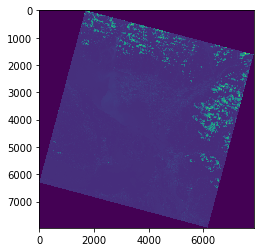

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(b2_data);